Mengimport library yang dibutuhkan

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import numpy as np
import pandas as pd
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Mengimport data dari google drive menggunakan library pandas

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Articles.csv', encoding='latin1')
df

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business
...,...,...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business


In [9]:
df.dtypes

Article     object
Date        object
Heading     object
NewsType    object
dtype: object

In [10]:
df.isnull().sum()

Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

In [11]:
newstypes = df['NewsType'].unique()
newstypes

array(['business', 'sports'], dtype=object)

# **Word Cloud**

menampilkan frequensi munculnya kata dalam keseluruhan dokumen. ukuran besar kecilnya teks menggambarkan seberapa sering kata tersebut muncul dalam keseluruhan dokumen.

**Business**

menampilkan frequensi kata dari berita yang berkategorikan business

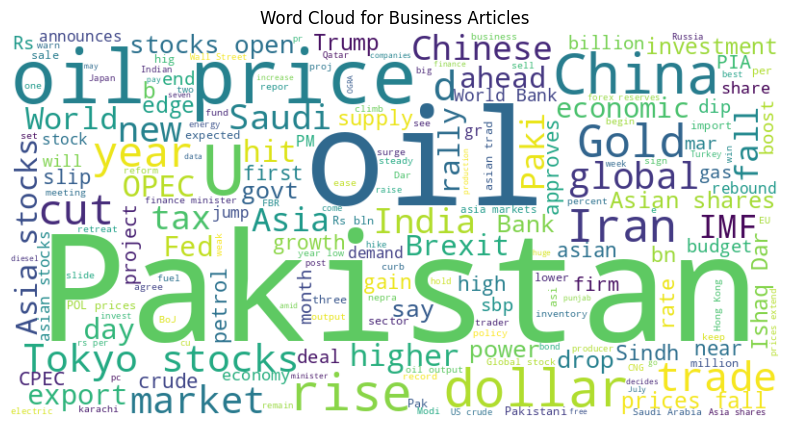

In [12]:
business_articles = df[df['NewsType'] == "business"]

# Menggabungkan teks dari artikel kategori "business"
business_text = ' '.join(business_articles['Heading'])

wordcloud_business = WordCloud(width=800, height=400, background_color='white').generate(business_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_business, interpolation='bilinear')
plt.title('Word Cloud for Business Articles')
plt.axis('off')
plt.show()


dari wordcloud diatas dapat dilihat bahwa kata-kata pakistan sering muncul dalam dokumen yang berkategorikan business.

**Sports**

menampilkan frequensi kata dari berita yang berkategorikan sports

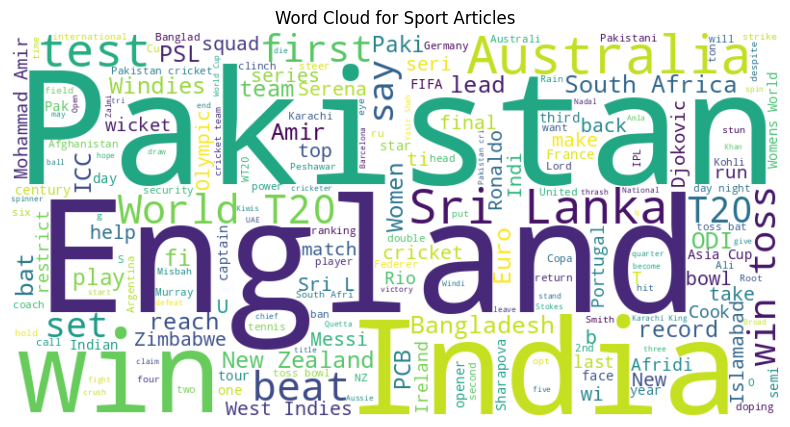

In [13]:
sport_articles = df[df['NewsType'] == "sports"]
sport_text = ' '.join(sport_articles['Heading'])

wordcloud_sport = WordCloud(width=800, height=400, background_color='white').generate(sport_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sport, interpolation='bilinear')
plt.title('Word Cloud for Sport Articles')
plt.axis('off')
plt.show()

#Preprocessing Data

In [14]:
X = df['Heading']
y = df['NewsType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
def tokenization(text):
    lst=text.split()
    return lst


X_train=X_train.apply(tokenization)
X_test=X_test.apply(tokenization)

In [16]:
def lowercasing(lst):
    lowercased_data = [text.lower() for text in lst]
    return lowercased_data

X_train = X_train.apply(lowercasing)
X_test = X_test.apply(lowercasing)


In [17]:
import string
def remove_punctuations(lst):
    remove_punctuation_data = [text.translate(str.maketrans("", "", string.punctuation)) for text in lst]
    return remove_punctuation_data
X_train=X_train.apply(remove_punctuations)
X_test=X_test.apply(remove_punctuations)

In [18]:
def remove_numbers(lst):
    new_lst = [''.join([i for i in s if not i.isdigit()]) for s in lst]
    return new_lst
X_train=X_train.apply(remove_numbers)
X_test=X_test.apply(remove_numbers)

In [19]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(lst):
    filtered_data = []
    for text in lst:
        word_tokens = word_tokenize(text)
        filtered_text = [word.lower() for word in word_tokens if word.lower() not in stop_words]
        if filtered_text:
            filtered_data.append(' '.join(filtered_text))
    return filtered_data

X_train=X_train.apply(remove_stopwords)
X_test=X_test.apply(remove_stopwords)

In [20]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    lemmatized_data = [' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) for text in lst]
    return lemmatized_data
X_train=X_train.apply(lemmatzation)
X_test=X_test.apply(lemmatzation)


In [21]:
X_train = [' '.join(article) for article in X_train]
X_test = [' '.join(article) for article in X_test]

In [22]:
X_train

['dollar pressured fed temper interest rate',
 'imf appreciates pakistan step fiscal manag',
 'sledging help bavuma knuckle maiden test',
 'shoaib malik withdraws karachi king captaincy',
 'england take slight first inning lead south afri',
 'serena withdraws qatar open flu',
 'england stokes undergoes knee operati',
 'saudi arabia say maintain stable petroleum polici',
 'pakistan win toss bowl sri l',
 'china say keep yuan basically stable basket currenci',
 'barcelona pair munir samper sign new',
 'nadal play single double mixed ri',
 'quaresma head portugal last euro',
 'australia set test twin spin attack windi',
 'maxus awarded nestle digital medium planning buying accou',
 'summer season brings boost business ptdc',
 'passport visa fee fetch r bln five year',
 'world bank announces bln financing afri',
 'england strike sri lanka bairstow century',
 'india announce windies tour revive ti',
 'sartaj aziz invite businessmen oman invest paki',
 'williamson guptill record stand help n

In [23]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train_vec, y_train)

predictions = dt.predict(X_test_vec)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)
percentage_correct = accuracy * 100
print("Percentage of Correct Predictions:", percentage_correct)

Accuracy: 0.9109461966604824
F1 Score: 0.910593775414122
Percentage of Correct Predictions: 91.09461966604823


In [25]:
gnb = GaussianNB()
gnb.fit(X_train_vec.toarray(), y_train)

# Lakukan prediksi
predictions = gnb.predict(X_test_vec.toarray())

# Evaluasi model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)
percentage_correct = accuracy * 100
print("Percentage of Correct Predictions:", percentage_correct)

Accuracy: 0.9406307977736549
F1 Score: 0.9406915730194045
Percentage of Correct Predictions: 94.06307977736549
